# Classification: learning to classify data with Machine Learning

### Libraries

In [42]:
import pandas as pd
import plotly.express as px
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle


### Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Alura/alura_classification_ml/data/marketing_investimento.csv')


In [3]:
df.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


## EDA

In [4]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


There are no null values.

### Categorical variables

In [5]:
px.histogram(df, x = 'aderencia_investimento', text_auto = True)

In [6]:
px.histogram(df, x = 'estado_civil', text_auto = True, color = 'aderencia_investimento',  barmode = 'group')

In [7]:
px.histogram(df, x = 'escolaridade', text_auto = True, color = 'aderencia_investimento',  barmode = 'group')

In [8]:
px.histogram(df, x = 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [9]:
px.histogram(df, x = 'fez_emprestimo', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

### Numerical variables

In [10]:
px.box(df, x = 'idade', color = 'aderencia_investimento')

In [11]:
px.box(df, x = 'saldo', color = 'aderencia_investimento')

In [12]:
px.box(df, x = 'tempo_ult_contato', color = 'aderencia_investimento')

In [13]:
px.box(df, x = 'numero_contatos', color = 'aderencia_investimento')

### Separating variables

**Target variable:** 'aderencia_investimento'.

**Explanatory:** All others.

In [14]:
x = df.drop('aderencia_investimento', axis = 1)
y = df['aderencia_investimento']


In [15]:
x.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4


In [16]:
y.head()

0    sim
1    sim
2    nao
3    sim
4    sim
Name: aderencia_investimento, dtype: object

### Applying One-Hot Enconding (Scikit-Learn)

In [17]:
# save columns names
colunas = x.columns

# apply One-Hot Encoder
one_hot = make_column_transformer((
    # drop if binary
    OneHotEncoder(drop = 'if_binary'),
    # select columns to apply
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    # prevents the other numeric columns from being removed by drop
    remainder = 'passthrough',
    # prevents the function from transforming the dataframe into a sparse dataframe, hiding some transformed information to take up less memory space.
    sparse_threshold=0
)


In [18]:
# apply one-hot encoding to x
x = one_hot.fit_transform(x)


In [19]:
# view the name of the new columns
one_hot.get_feature_names_out(colunas)


array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [20]:
# turn into dataframe
x_ = pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))
x_

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [21]:
x_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   onehotencoder__estado_civil_casado (a)      1268 non-null   float64
 1   onehotencoder__estado_civil_divorciado (a)  1268 non-null   float64
 2   onehotencoder__estado_civil_solteiro (a)    1268 non-null   float64
 3   onehotencoder__escolaridade_fundamental     1268 non-null   float64
 4   onehotencoder__escolaridade_medio           1268 non-null   float64
 5   onehotencoder__escolaridade_superior        1268 non-null   float64
 6   onehotencoder__inadimplencia_sim            1268 non-null   float64
 7   onehotencoder__fez_emprestimo_sim           1268 non-null   float64
 8   remainder__idade                            1268 non-null   float64
 9   remainder__saldo                            1268 non-null   float64
 10  remainder__t

In [22]:
# Label Encoder - exclusive function to transform the target variable 'aderencia_investimento'
label_encoder = LabelEncoder()

# apply function to y: sim -> 1; não -> 0
y = label_encoder.fit_transform(y)
y

array([1, 1, 0, ..., 1, 1, 1])

## Modeling

### Split data

In [23]:
# stratify - maintains the proportion based on the target variable
# random_state - seed

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y,  random_state = 5)

### Model Dummy Classifier

This algorithm classifies all the records in the database based on the category of the target variable with the highest frequency - in this case, "aderencia_investimento" == "nao".

In the exploratory analysis, we can see that the class with the highest frequency is that which does not adhere to the investment.

In [24]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

# model hit score
dummy.score(x_teste, y_teste)



0.6025236593059937

At EDA, the variable "adherence_investment" == "no" represents 60.41%.

### Model Decision Tree

In [25]:
# adjusted model
arvore = DecisionTreeClassifier(random_state =5)
arvore.fit(x_treino, y_treino)


DecisionTreeClassifier(random_state=5)

In [26]:
# prediction - one answer for each base line
arvore.predict(x_teste)


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [27]:
# model hit rate
arvore.score(x_teste, y_teste)


0.6656151419558359

In [28]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']


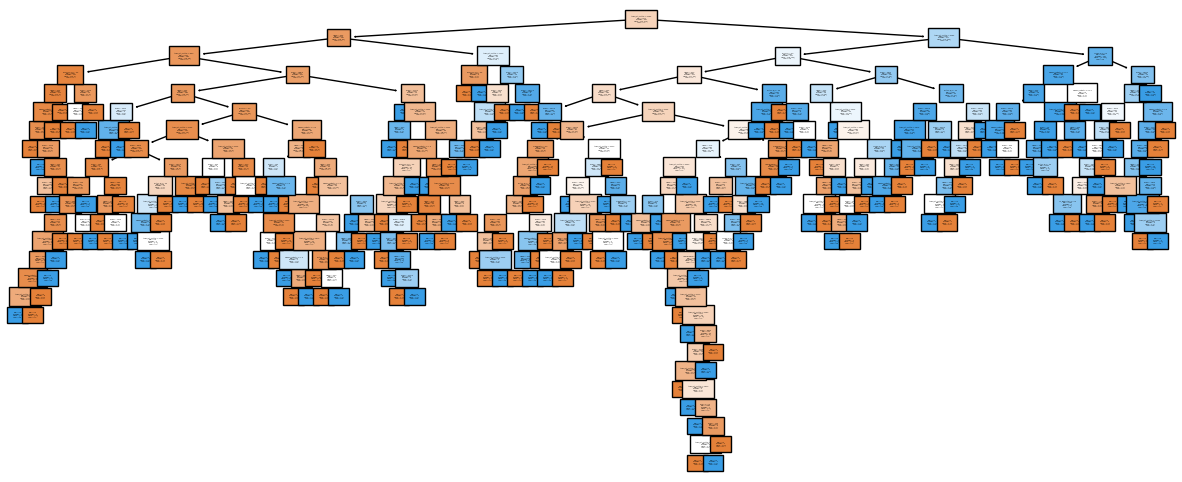

In [29]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1, feature_names = nome_colunas);



In [30]:
# adjusted model
## max_depth - maximum tree depth
arvore = DecisionTreeClassifier(max_depth = 3, random_state =5)
arvore.fit(x_treino, y_treino)



DecisionTreeClassifier(max_depth=3, random_state=5)

In [31]:
arvore.score(x_treino, y_treino)


0.7613038906414301

In [32]:
arvore.score(x_teste, y_teste)
# decreasing the depth of the tree improved the hit score

0.7160883280757098

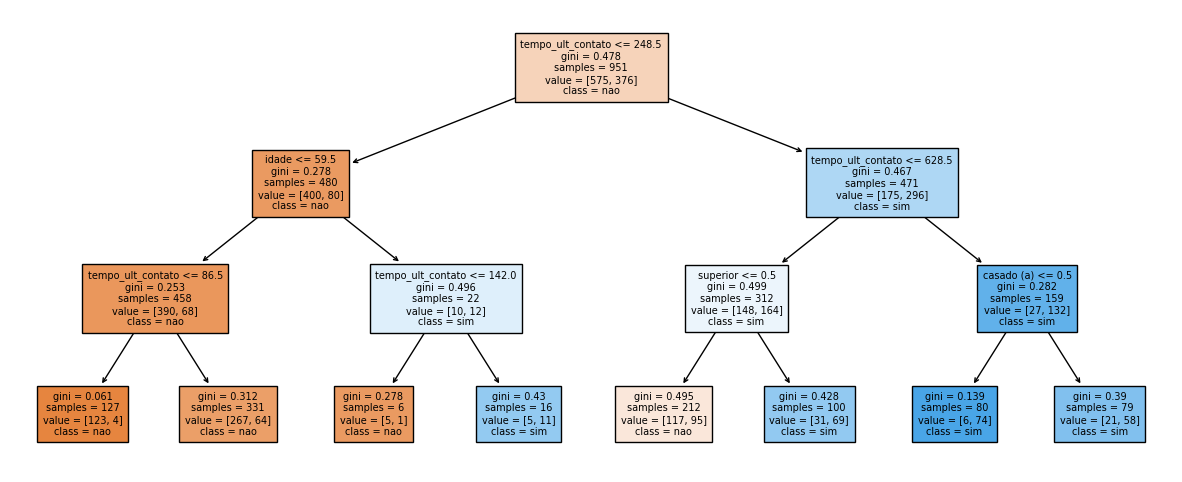

In [33]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7, feature_names = nome_colunas);


[Decision tree classifier](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) documentation.

The first step is to select a column from the database that will be used to split the data into 2 subsets. The aim is for as much data as possible to be separated in relation to the target variable. So the best possible result would be if one of the subsets only had data from one category of the target variable and the other subset only had data from the other remaining category. To make the best possible choice, different columns and values are tested, and the one that provides the best separation is chosen as the first rule in the decision tree.

To define what a good separation is, mathematical calculations are made to obtain the proportion of data from each category of the target variable within the subsets. The result of this calculation is known as the impurity metric. There are different types of metrics, the most commonly used being entropy and the Gini index.

### Normalization

In [34]:
# Normalization of variables to apply the KNN algorithm

normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)


In [35]:
pd.DataFrame(x_treino_normalizado)


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


### Modelo KNN

The KNN algorithm works by calculating the distance between all the elements in the database to determine the classification of a record, which is done by checking the classes of the elements that are closest.

In this dynamic, the first step is to define a value for 'k', which is the number of nearest neighbors to be considered when making the classification. The choice of this value is important and affects the model's performance. Next, the distance between all the elements is calculated and the results of these distances are stored.

Finally, to classify each element, the 'k' elements closest to it are selected and a vote is taken. Voting consists of selecting the class that appears most frequently in these closest neighbors.

Data normalization is essential for this algorithm because it is based on distance calculations. In addition, it is a very computationally demanding algorithm when there is a lot of data, since it needs to calculate the distances between all the training elements.

In [37]:
knn = KNeighborsClassifier() # default value 3 - the three nearest neighbors

knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [38]:
# normalize the data test
x_teste_normalizado = normalizacao.transform(x_teste)

# evaluates performance
knn.score(x_teste_normalizado, y_teste)


0.6876971608832808

### Models evaluation

In [40]:
print(f'Accuracy Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Accuracy Tree: {arvore.score(x_teste, y_teste)}')
print(f'Accuracy KNN: {knn.score(x_teste_normalizado, y_teste)}')



Accuracy Dummy: 0.6025236593059937
Accuracy Tree: 0.7160883280757098
Accuracy KNN: 0.6876971608832808


In [43]:
# use in an external environment, can be used in another project
## write in bytes

with open('modelo_onehotenc.pkl', 'wb') as arquivo:
    pickle.dump(one_hot, arquivo)

with open('modelo_arvore.pkl', 'wb') as arquivo:
    pickle.dump(arvore, arquivo)

In order to use the model, it needs to be exported, and that's when pickle comes into play. The pickle module in Python is a powerful and versatile tool that allows you to serialize and deserialize Python objects. This serialization process involves converting Python objects into a binary representation that can be stored in a file. Later, this representation can be deserialized to recreate the original object.

In this way, machine learning models can be stored in pickle files so that they can be used in other programs. It completely preserves the state of the object, including all parameters and settings. In addition, the binary format generated by pickle is platform-independent, which means that you can create a file on one operating system and load it on another without any compatibility problems. It's worth noting that in different versions of Python this can be a problem. Objects serialized in a specific version may not load correctly in another version. It is therefore very important to know the version of the language and libraries used in the project so that they are replicated within the system in which they will be used.

In [44]:
# application example with new data
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

# create dataframe with new data
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [45]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

In [46]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

# 1: aderência; 0: não aderência

array([1])